In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='white') 

/home/lab_services_student/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# !kaggle datasets download -d joebeachcapital/30000-spotify-songs
# !unzip 30000-spotify-songs.zip

In [5]:
df=pd.read_csv("spotify_songs.csv")
pd.set_option('display.max_columns', None)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

From the Above cells it is shown that this is a dataset that contains 32 833 records/observations with 22 columns/features
Information provided from the read.me of the dataset shows the each record represents a song in Spotify's database with each of the columns is information relating to the song.

<b>track_id</b>  is the song's unique ID<br>
<b>track_name</b> is the song's name<br>
<b>track_artist</b> is the song's Artist<br>
<b>track_popularity</b> is the song's Popularity (0-100) where 0 is not popular and 100 is extrememly popular<br>
<b>track_album_id</b> is the song's album unique ID<br>
<b>track_album_name</b> is the song's album name<br>
<b>track_album_release_date</b> is the date when the song's album released<br>
<b>playlist_name is the name</b> of playlist of the song<br>
<b>playlist_id</b> is the playlist ID<br>
<b>playlist_genre</b> is the playlist genre<br>
<b>playlist_subgenre</b> is the playlist subgenre<br>
<b>danceability</b> is how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
<b>energy</b> is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. <br>
<b>key</b> is the estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 =  D, and so on. If no key was detected, the value is -1.<br>
<b>loudness</b> is the overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.<br>
<b>mode</b> indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.<br>
<b>speechiness</b> is the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>
<b>acousticness</b> is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.<br>
<b>instrumentalness</b> is whether a track contains no vocals.  The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.<br>
<b>liveness</b> is the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.<br>
<b>valence</b> is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).<br>
<b>tempo</b> is overall estimated tempo of a track in beats per minute (BPM). <br>
<b>duration_ms</b> is the duration of song in milliseconds<br>

since the release data is an object data type it would be beneficial to convert it to a proper date type for EDA

In [7]:
df['album_release_year'] = pd.DatetimeIndex(df['track_album_release_date']).year
df['album_release_month'] = pd.DatetimeIndex(df['track_album_release_date']).month
df['album_release_day'] = pd.DatetimeIndex(df['track_album_release_date']).day

In [8]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month,album_release_day
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,6,14
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,12,13
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,7,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,7,19
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,3,5


In [9]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
album_release_year          0
album_release_month         0
album_release_day           0
dtype: int64

We can see that there are 5 missing values for both track_name and track_artist
this means there are (5-10) records that are incomplete. This is dataset has 32 833 records it (5-10) records would not have that much impact on the whole dataset and its possible to just remove those incomplete records to ease the EDA process. 

In [10]:
df[df['track_name'].isna()==True]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month,album_release_day
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012,1,5
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,2017,12,1
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,2017,12,1
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,2012,1,5
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012,1,5


It turns out that it is only 5 rows that are incomplete as they all having both track_name and track_artist missing, it can be removed from the dataframe. Tho it is only 5 in a dataset of 32 thousand, they wouldnt have any major impact on the analysis however in order to properly make use of the data set, rows with missing or null data should be removed from the dataset.

In [11]:
df.dropna()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month,album_release_day
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,6,14
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,12,13
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,7,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,7,19
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,4,28
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,3,8
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,4,21
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,1,1


In [12]:
df.duplicated().any()

False

with no nan values or duplicates, I can begin devling into the values, meaning and relationships in the dataset.

In [13]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,album_release_year,album_release_month,album_release_day
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622,2011.137270,6.145829,13.527305
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182,11.417451,3.833213,9.645188
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000,1957.000000,1.000000,1.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000,2008.000000,2.000000,4.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000,2016.000000,6.000000,13.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000,2019.000000,10.000000,22.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000,12.000000,31.000000


this tables provides a plethora of information regarding the attriutes of songs in the entire dataset
to list some;
- most songs we released around 2011, 
- the average song popularity is around 42
- the average energy of 70 means that most songs are moderately fast, loud and noisy
- the average song temp is 121 bpm 

lets look at the feature distrubution of each feature

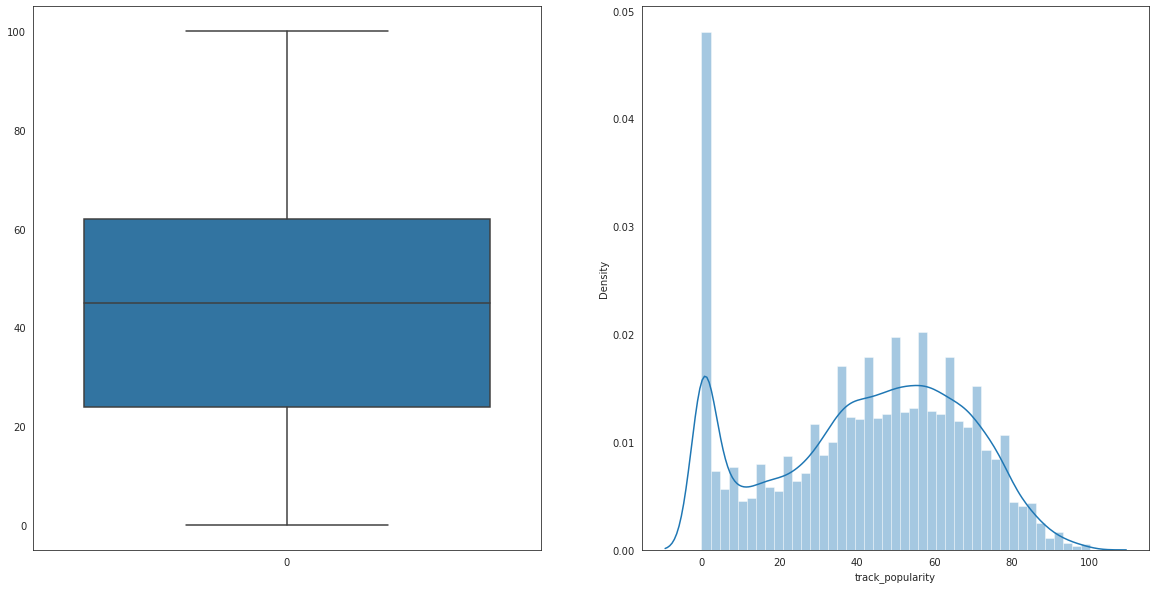

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df.track_popularity, ax=axes[0])
sns.distplot(df.track_popularity, ax=axes[1])
plt.show()

we can see with popularity that is whilst it looks acceptable in  box plot the desnity graph shows that majority of the songs in the dataset have a popularity of 0

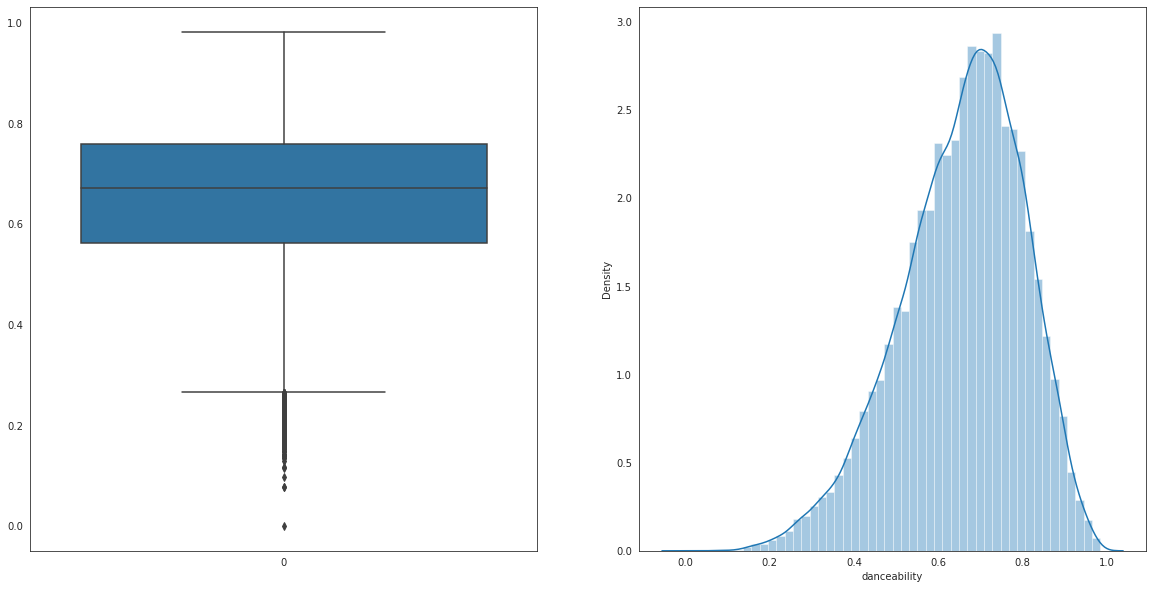

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df.danceability, ax=axes[0])
sns.distplot(df.danceability, ax=axes[1])
plt.show()

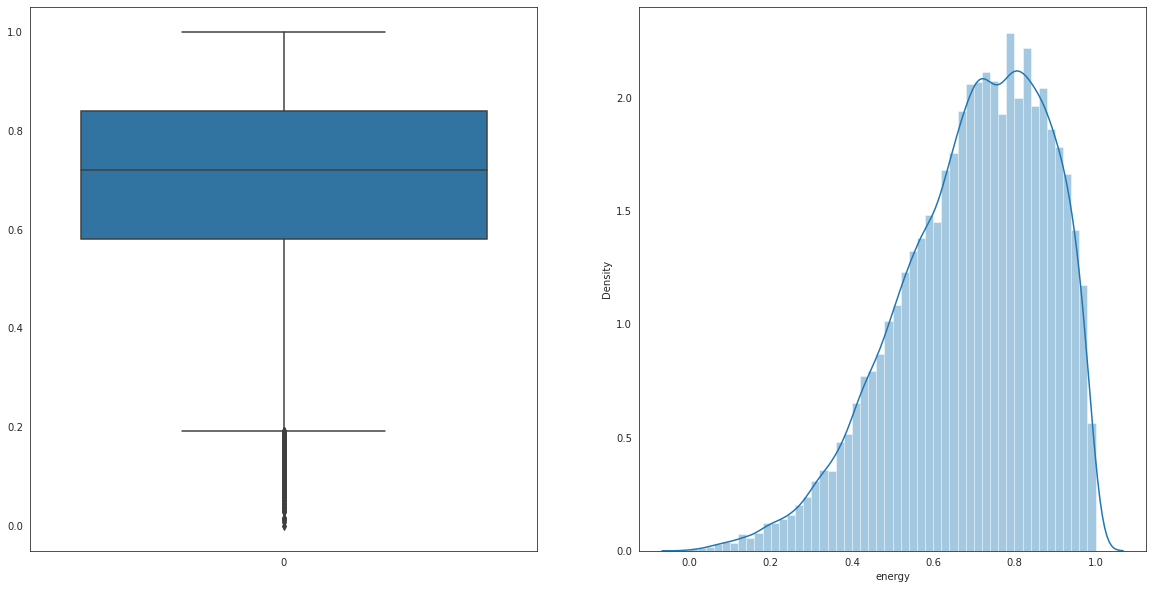

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df.energy, ax=axes[0])
sns.distplot(df.energy, ax=axes[1])
plt.show()

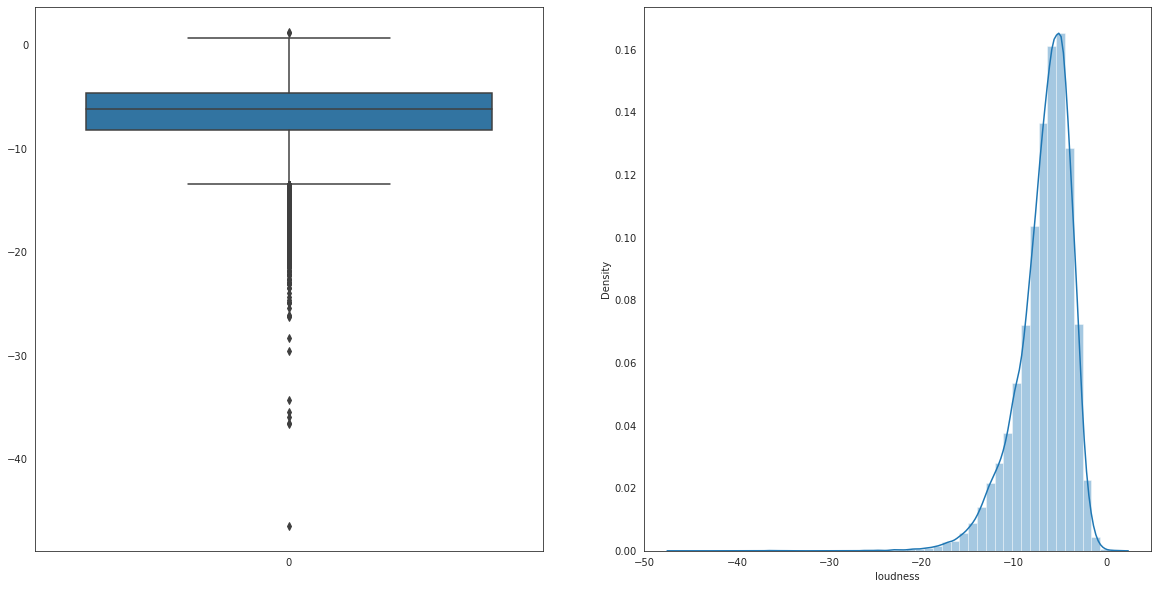

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df.loudness, ax=axes[0])
sns.distplot(df.loudness, ax=axes[1])
plt.show()

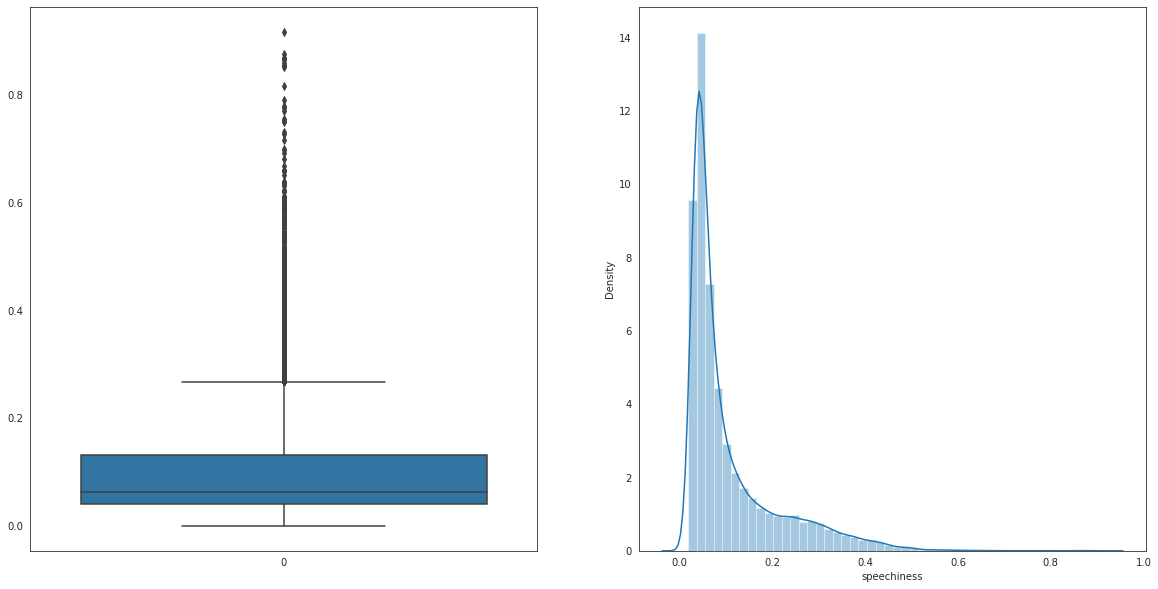

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(data=df.speechiness, ax=axes[0])
sns.distplot(df.speechiness, ax=axes[1])
plt.show()

- Most songs  have a speechiness of 0.0 - 0.2 which means most of the songs have more of music and non-speech like tracks. 
- Noticeably that few songs have 0 dancibility whilst most are between 0.5 and 0.8
- Most songs hve higher energy
- VEry little songs have a loudness of less than -10 DB whilst most have a loudness of above -10 DB

<Figure size 288x288 with 0 Axes>

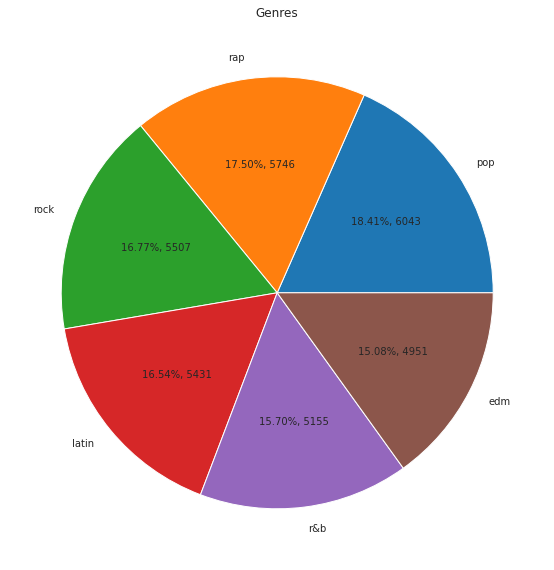

In [23]:
y=df['playlist_genre'].value_counts()
plt.figure(figsize=plt.figaspect(1))
fig = plt.figure(figsize=(15,30))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Genres')
plt.pie(y, labels=df['playlist_genre'].unique(), autopct=lambda p:f'{p:.2f}%, {p*sum(y)/100 :.0f}')
plt.show()

Highlighting that the most popular genre is pop although it can be said that the other genres are not that far away in terms of numbers

<Figure size 288x288 with 0 Axes>

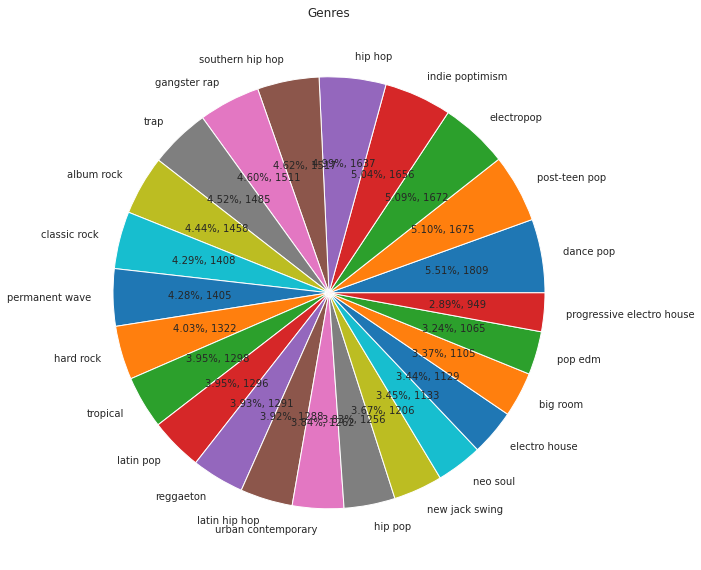

In [24]:
y=df['playlist_subgenre'].value_counts()
plt.figure(figsize=plt.figaspect(1))
fig = plt.figure(figsize=(15,30))
ax = fig.add_axes((0,0,.5,1))
ax.set_title('Genres')
plt.pie(y, labels=df['playlist_subgenre'].unique(), autopct=lambda p:f'{p:.2f}%, {p*sum(y)/100 :.0f}')
plt.show()

In [ ]:
df['playlist_subgenre'].value_counts()

progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop                      1256
big room                     1206
new jack swing               1133
post-teen pop                1129
permanent wave               1105
album rock                   1065
reggaeton                     949
Name: playlist_subgenre, dtype: int64

The sam can be said for subgenres as even tho progressive electro house is the most occurrent, the other subgenres at least the next 5 are not that far from each other.

In [ ]:
df['album_release_year'].value_counts()

2019    9081
2018    3312
2017    2430
2016    2127
2015    1779
        ... 
1960       4
1962       2
1957       2
1958       1
1961       1
Name: album_release_year, Length: 63, dtype: int64

The year in which there was the most songs released is 2019

In [73]:
df['album_release_month'].value_counts()

1     6948
11    3359
10    3086
9     2543
12    2448
6     2390
8     2299
5     2214
3     2014
7     2010
4     1904
2     1618
Name: album_release_month, dtype: int64

the month in which most songs are released in January 

Which year had the highest average popularity of songs released

In [76]:
y=df.groupby('album_release_year')['track_popularity'].mean().sort_values(ascending=False)[:10]


album_release_year
1958    73.000000
1962    64.000000
1968    58.217391
1966    53.526316
1980    52.247423
1972    52.229730
2019    51.402489
1979    50.309524
1981    49.954023
1982    49.829787
Name: track_popularity, dtype: float64

<Axes:title={'center':'Top 10 years and Average track popularity'}, xlabel='album_release_year', ylabel='track_popularity'>

<Figure size 288x288 with 0 Axes>

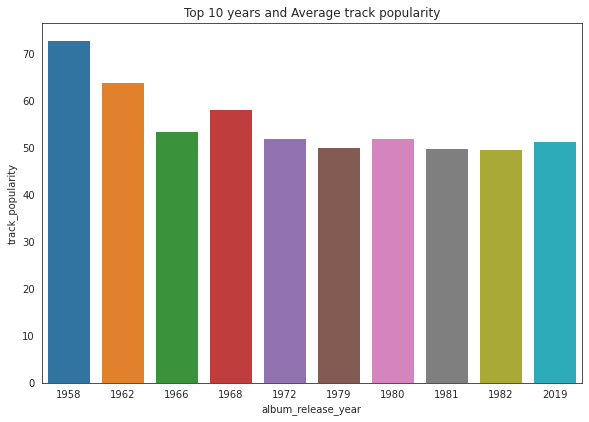

In [77]:
plt.figure(figsize=plt.figaspect(1))
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes((0,0,.5,.5))
ax.set_title('Top 10 years and Average track popularity')
sns.barplot(x=y.index,y=y)

We can see that surprisingly it is 1958 in which the the most popular songs were released. With the 10th place a year within the last 5 years

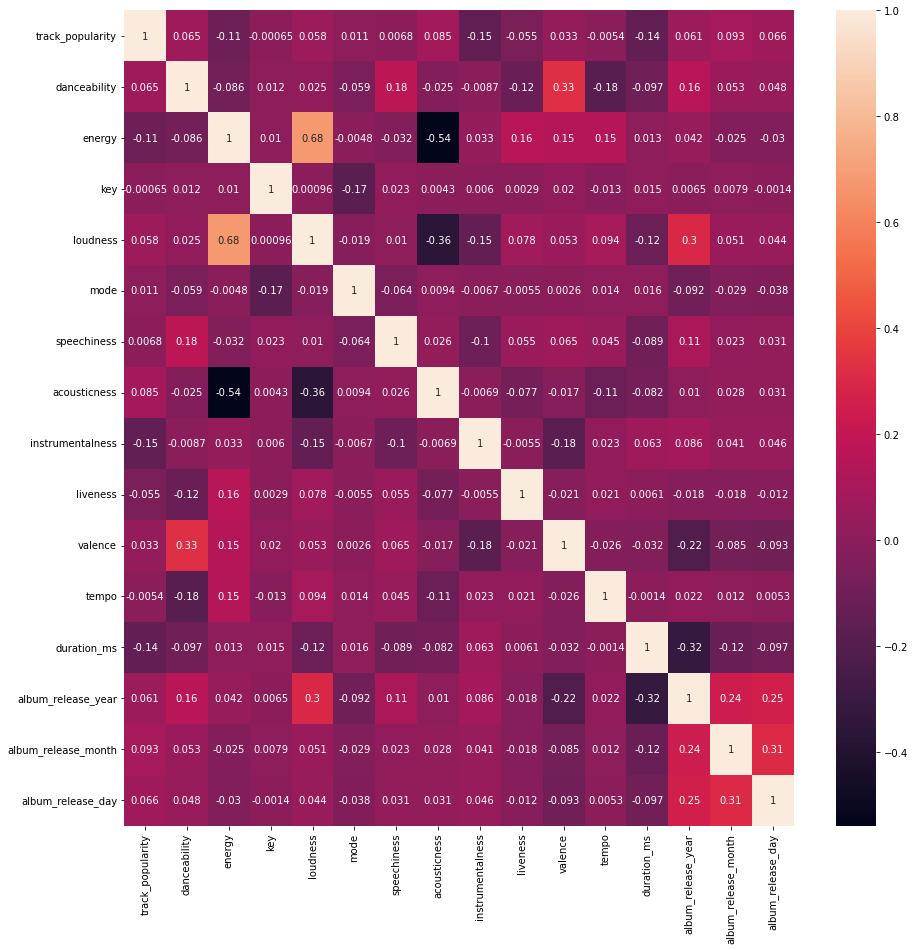

In [ ]:

cols = df.select_dtypes(exclude='object')

plt.figure(figsize=(15,15))
sns.heatmap(cols.corr(),annot=True)
plt.show()

From the chart it can be said that:
- energy, instrumentalness and duration are the potenially the most correlated with popularity, even if slightly negatively
- The alum realease year is slightly correlated with duration
- energy is moderately correlated with acousticness and loudness

which artists has the most popular songs 

track_artist
Trevor Daniel    97.000000
Y2K              91.000000
Don Toliver      90.714286
Roddy Ricch      88.210526
DaBaby           87.857143
Kina             85.400000
JACKBOYS         85.166667
YNW Melly        84.600000
Tainy            84.000000
Dadá Boladão     84.000000
Name: track_popularity, dtype: float64

<Figure size 288x288 with 0 Axes>

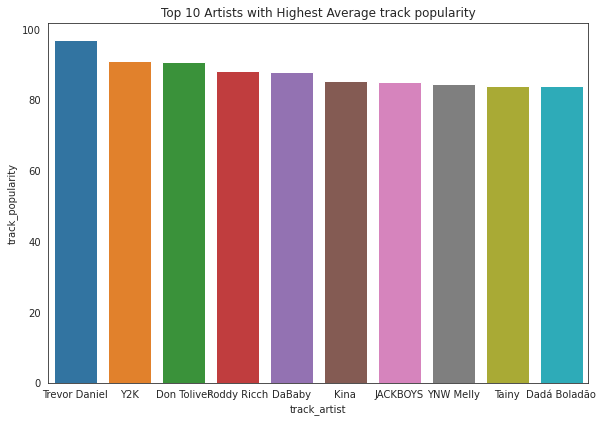

In [79]:
y=df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=plt.figaspect(1))
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes((0,0,.5,.5))
ax.set_title('Top 10 Artists with Highest Average track popularity')
sns.barplot(x=y.index,y=y)
y

The answer being Trevor Daniel